## 01. Data preprocessing

Data preprocessing is a crucial step in any kinds of omics data analysis in order to remove unnecessary sources of variance and make clearer heterogeneity in our interests. We used two python packages, _anndata_ and _scanpy_, for the preprocessing. 

#### Load an Anndata object saved in .hdf5 file for each assay


In [4]:
from anndata import read_h5ad
gex = read_h5ad("../data/GSE194122/gex.hdf5")
atac = read_h5ad("../data/GSE194122/atac.hdf5")
gex

AnnData object with n_obs × n_vars = 2498 × 13431
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [5]:
atac

AnnData object with n_obs × n_vars = 2498 × 116490
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [6]:
gex.obs.cell_type.unique()

['NK', 'Normoblast', 'ILC']
Categories (3, object): ['NK', 'Normoblast', 'ILC']

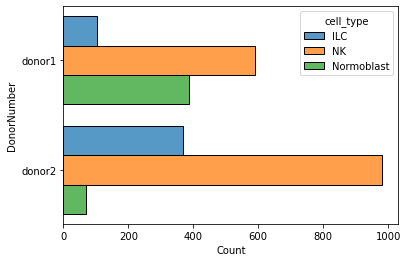

In [8]:
import seaborn as sns
sns.histplot(data=gex.obs, hue="cell_type", y="DonorNumber", multiple="dodge", shrink=0.8)

In [9]:
import scanpy as sc
sc.tl.pca(gex)
sc.pp.neighbors(gex)
sc.tl.umap(gex)

<Figure size 1080x216 with 0 Axes>

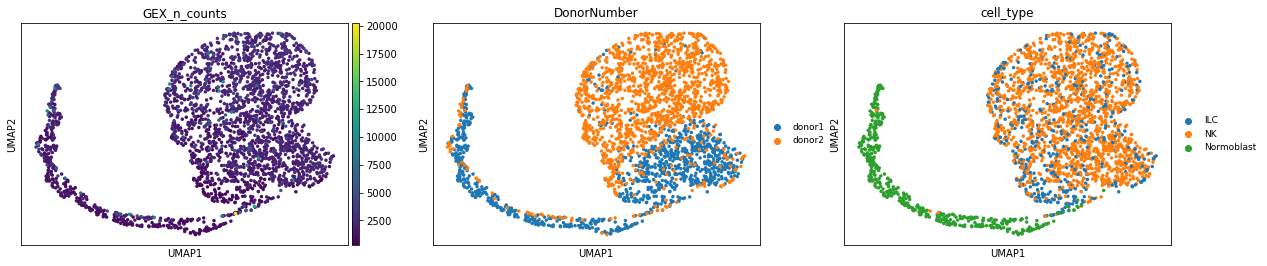

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
sc.pl.umap(gex, color=["GEX_n_counts", "DonorNumber", "cell_type"], legend_fontsize=9)
plt.show()

<Figure size 1080x216 with 0 Axes>

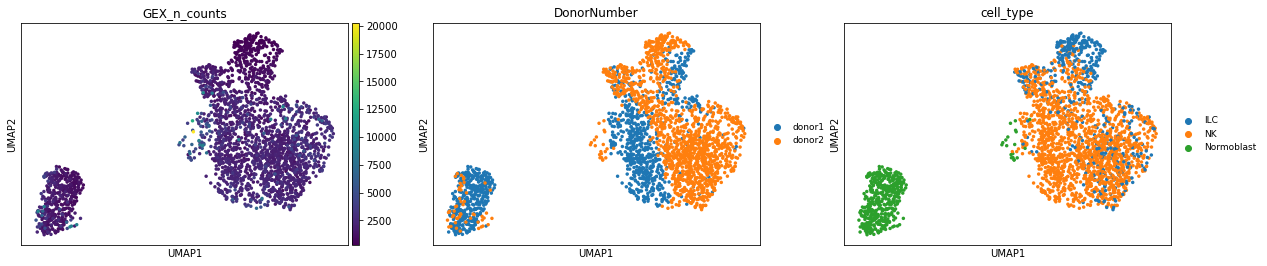

In [11]:
sc.pp.log1p(gex)
sc.tl.pca(gex)
sc.pp.neighbors(gex)
sc.tl.umap(gex)
plt.figure(figsize=(15,3))
sc.pl.umap(gex, color=["GEX_n_counts", "DonorNumber", "cell_type"], legend_fontsize=9)
plt.show()

<Figure size 1080x216 with 0 Axes>

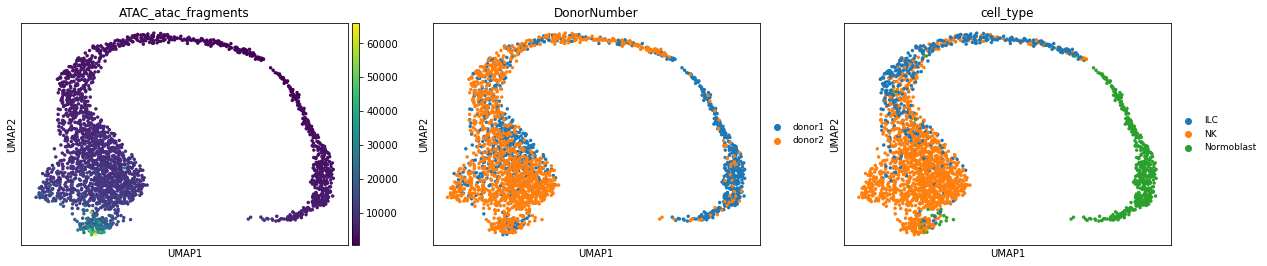

In [12]:
sc.tl.pca(atac)
sc.pp.neighbors(atac)
sc.tl.umap(atac)
plt.figure(figsize=(15,3))
sc.pl.umap(atac, color=["ATAC_atac_fragments", "DonorNumber", "cell_type"], legend_fontsize=9)
plt.show()

In [13]:
sc.pp.normalize_total(atac)
sc.pp.log1p(atac)

<Figure size 1080x216 with 0 Axes>

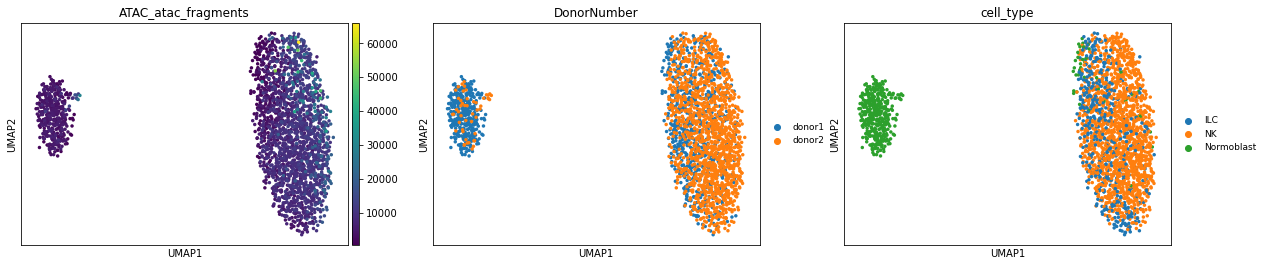

In [14]:
sc.tl.pca(atac)
sc.pp.neighbors(atac)
sc.tl.umap(atac)
plt.figure(figsize=(15,3))
sc.pl.umap(atac, color=["ATAC_atac_fragments", "DonorNumber", "cell_type"], legend_fontsize=9)
plt.show()

In [15]:
gex.write("../data/GSE194122/gex_preprocessed.hdf5")
atac.write("../data/GSE194122/atac_preprocessed.hdf5")